# Integrated water vapor

 http://vortex.plymouth.edu/~j_cordeira/ARPortal/EU/Archive/2016122518/html/D1_IVT_0.html#tab
 - 850-hPa wind speed (m s^-1)
 - SLP (solid/dashed contours every 4 hPa)
 - total precipitable water (mm, shaded according to color bar)
 
 
 ARs defined following Ralph et al. (2004) as contiguous regions $\ge$ 2000km long and $\le$ 1000 km wide with IWV $\ge$ 20 mm



 http://apps.ecmwf.int/codes/grib/param-db
 #### Parameters from ECMWF
    - name = 'total column water vapor',   shortName = 'tcwv',     [kg kg^-1]
    - name = 'mean sea level pressure',    shortName = 'msl'     [Pa]
    - name = 'U component of wind',        shortName = 'u',      [m s^-1]
    - name = 'V component of wind',        shortName = 'v',      [m s^-1]




In [15]:
import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
from scipy import ndimage
from datetime import date
import calendar



In [16]:
year = '2016'
mon = '12'
day = '25'
time = '18'

In [29]:
### Define colorbar colors
champ = 255.
# tot. precipitable water (colorbar)
no1 = np.array([255,255,255])/champ
no2 = np.array([70,0,255])/champ
no3 = np.array([6,109,255])/champ
no4 = np.array([0,196,38])/champ
no5 = np.array([14,223,11])/champ
no6 = np.array([255,228,0])/champ
no7 = np.array([255,180,0])/champ
no8 = np.array([255,94,0])/champ
no9 = np.array([255,0,0])/champ
no10 = np.array([225,0,0])/champ
no11 = np.array([139,0,106])/champ
no12 = np.array([102,0,137])/champ

# pressure lines
no13 = np.array([16,16,16])/champ

In [18]:
def opengrib(yyyy, mm, dd, tt, pm, path):
    grib = '%s/%s/param_%s_%s%s%s_%s00.grib' % (path,pm,pm,yyyy,mm,dd,tt)
    grbs = pygrib.open(grib)
    return(grbs);

In [19]:
def selectgrb(grbs, sN, tOL, lv):
    val = grbs.select()[0]
    val = grbs.select(shortName = sN, typeOfLevel = tOL, level = lv)[0]
    val = val.values
    return(val);

In [20]:
def shiftgrb(grb,val):
    lat,lon = grb.latlons()
    lons = lon[0,:]
    val,lons = shiftgrid(180., val, lons, start = False)
    lats = lat[:,0]
    
    lons,lats = np.meshgrid(lons,lats)
    plons,plats = m(lons,lats)
    return(plons,plats,val);

In [21]:
### OPEN FILES
path = '../test_dataECMWF/SCA/pl'

### Wind
parameter = 'uv'
grbsUV = opengrib(yyyy = year, mm = mon, dd = day, tt = time, pm = parameter, path = path)

path = '../test_dataECMWF/SCA/sfc'
### Mean Sea Level Pressure
parameter = 'msl'
grbsMSL = opengrib(yyyy = year, mm = mon, dd = day, tt = time, pm = parameter, path = path)

### Precipitable Water
parameter = 'tcwv'
grbsPW = opengrib(yyyy = year, mm = mon, dd = day, tt = time, pm = parameter, path = path)



In [22]:
### GET FILE DATA
tOL = 'isobaricInhPa'
lv = 850
## Wind
# U component of wind
sN = 'u'
grbUV = grbsUV.select()[0]
wind_u = selectgrb(grbsUV, sN, tOL, lv)
# V component of wind
sN = 'v'
wind_v = selectgrb(grbsUV, sN, tOL, lv)

In [23]:
## Mean sea level pressure
tOL = 'surface'
lv = 0
sN = 'msl'
grbMSL = grbsMSL.select()[0]
MSL = selectgrb(grbsMSL, sN, tOL, lv)

### converst MSL from Pa --> hPa
MSL = 0.01 * MSL

In [24]:
## Total colum water vapour
sN = 'tcwv'
grbPW = grbsPW.select()[0]
PW = selectgrb(grbsPW, sN, tOL, lv)

In [44]:
# Plotting data on a map (Example Gallery) https://matplotlib.org/basemap/users/examples.html
m = Basemap(projection='merc', \
            llcrnrlon=-80., urcrnrlon=50., \
            llcrnrlat=15.,urcrnrlat=75., \
            resolution='l')

In [26]:
### Latitudes, Longitudes and shiftgrid
plonsU,platsU, wind_u = shiftgrb(grbUV,wind_u)
plonsV,platsV, wind_v = shiftgrb(grbUV,wind_v)
plonsMSL,platsMSL, MSL = shiftgrb(grbMSL,MSL)
plonsPW,platsPW, PW = shiftgrb(grbPW,PW)

In [27]:
### Dates for plotting
yr = int(year)
mo = int(mon)
dy = int(day)
my_date = date(yr,mo,dy)
calday = calendar.day_name[my_date.weekday()]
calmon = calendar.month_abbr[mo]




### Plotting data on a map (Example Gallery) https://matplotlib.org/basemap/users/examples.html


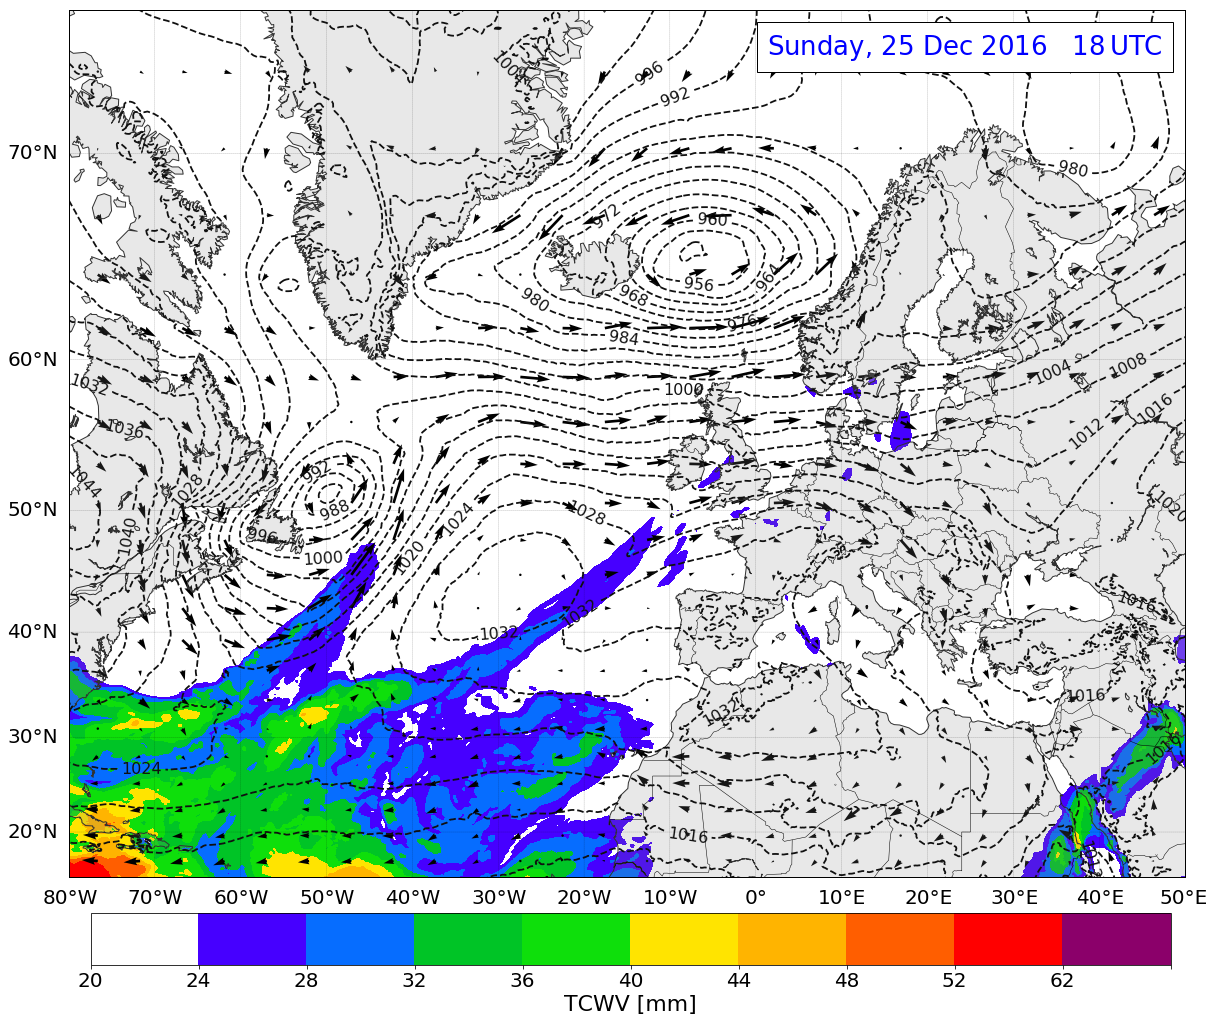

In [45]:
### PLOT FIGURE
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(1,1,1)

### Draw Latitude Lines
m.drawparallels(np.arange(-90.,120.,10.),labels=[1,0,0,0],fontsize=20,linewidth=0.2)

### Draw Longitude Lines
m.drawmeridians(np.arange(-180.,180.,10.),labels=[0,0,0,1],fontsize=20,linewidth=0.2)

### Draw Map
m.drawcoastlines(color=[np.array([50,50,50])/champ])
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color='grey',alpha=0.18)


### Plot contour lines for precipitable water
PWlevs = [16., 20., 24., 28., 32., 36., 40., 44., 48., 52., 62.]
Pmap = colors.ListedColormap([no1, no2, no3, no4, no5, no6, no7, no8, no9, no10, no11])
normP = colors.BoundaryNorm(boundaries = PWlevs, ncolors=Pmap.N)
cp = m.contourf(plonsPW, platsPW, PW, PWlevs, norm = normP, cmap = Pmap)




### Plot MSL pressure every 2 hPa
clevs = np.arange(900,1100.,4.)
cc = m.contour(plonsMSL, platsMSL, MSL, clevs, colors=[no13], linewidths = 1.8, linestyles = 'dashed')
plt.clabel(cc, fontsize=16, inline = 1, fmt ='%1.0f')


### Plot contour lines for 850-hPa wind 
# every 20,35 values from the wind
cs = m.quiver(plonsU[::20,::35], platsU[::20,::35], wind_u[::20,::35], wind_v[::20,::35])#, Ulevels, norm = norm, cmap=Umap)




### Add Colorbar
cbaxes = fig.add_axes([0.14, 0.05, .75, .045] )   #[left, bottom, width, height] 
cbar = plt.colorbar(cp,orientation='horizontal',cax = cbaxes,ticks=PWlevs)#, cax = cbaxes)#, shrink=0.5)
cbar.ax.set_xlabel('TCWV [mm]',fontsize=22)
cbar.ax.set_xticklabels(['', '24', '28', '32', '36', '40', '44', '48', '52','62'])  # horizontal colorbar
cbar.ax.tick_params(labelsize=20) 




### Add Textbox
ax.text(0.98,0.94, '%s, %s %s %s   %s$\,$UTC' %(calday, day, calmon, year, time),
            verticalalignment = 'bottom',  horizontalalignment='right',
            transform = ax.transAxes,
            color ='blue', fontsize=26,
            bbox={'facecolor':'white','alpha':1., 'pad':10})

### Add Title
#    fig.suptitle('Jet, Thickness, SLP, and Moisture', fontsize=16, fontweight='bold') 
#    ax.set_title('MSLP (solid contours every 4$\,$hPa), \n \
#    250$\,$hPa wind speed (m$\,$s$^{-1}$, shaded according to the color bar), \n \
#    1000-500$\,$hPa thickness (dashed contours every 6 dam), \n \
#    total precipitable water (mm, shaded according to gray scale)', \
#            fontsize=13)
#plt.title('') 


### Save
plt.savefig('../synoptic_figs/TCWV_U850/%s%s%s_%s.png' % (year, mon, day,time))
## with header
#    plt.savefig('../synoptic_figs/Jet_Thick_SLP/%s%s%s_%s_header.png' % (year, mon, day,time))



###
plt.show()
plt.close()